# Figure 2


In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib

In [9]:
matplotlib.rc('font', family='Arial') 

In [3]:
df=pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
df=df.rename(columns={'aggregated_value':'count', 'country':'Mention_country', 'affiliation_country':'Aff_country'})

df=df[df['year'].isin(np.arange(2003, 2019, 1))]
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
physical_sciences=[ 'MATH', 'ENGI', 'PHYS', 'COMP','MULT']
df=df[~df['subjarea'].isin(physical_sciences)]

In [4]:
def find_cat(subject):  
    social_sciences=['PSYC', 'SOCI', 'DECI', 'ARTS', 'ECON', 'BUSI']
    health_sciences=['MEDI', 'NURS', 'DENT', 'HEAL', 'VETE']
    physical_sciences=['CHEM', 'EART', 'ENER', 'CENG',  'ENVI','MATE']
    life_sciences=['PHAR', 'NEUR', 'AGRI', 'IMMU', 'BIOC']
    if subject in social_sciences:
        return 'Social sciences'
    elif  subject in health_sciences:
        return 'Health sciences'
    elif subject in physical_sciences:
        return 'Physical sciences'
    elif subject in life_sciences:
        return 'Life sciences'
    else:
        return subject

In [5]:
df['cat']=df['subjarea'].apply(find_cat)
df['year_arabspring']=df['year'].apply(lambda x: 'before' if x>=2003 and x<=2010 else 'after' )
df['is_internal_attention']=df['Mention_country']==df['Aff_country']

result_df=df.groupby(['cat','Mention_country', 'year_arabspring', 'is_internal_attention'])['count'].sum().reset_index()

total_df=result_df.groupby(['Mention_country','year_arabspring','is_internal_attention'])['count'].sum().reset_index().rename(columns={'count':'total'})

result_df=result_df.merge(total_df, on=['Mention_country','year_arabspring','is_internal_attention'])
result_df['Share']=result_df['count']/result_df['total']

C:\Users\Yasaman\AppData\Local\Temp\ipykernel_55900\3220235733.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Mention_country'] = subset['Mention_country'].map(rev_Country_list)
C:\Users\Yasaman\AppData\Local\Temp\ipykernel_55900\3220235733.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['sorted_order'] = subset['Mention_country'].apply(lambda x: country_names.index(x))
C:\Users\Yasaman\AppData\Local\Temp\ipykernel_55900\3220235733.py:12: SettingWithCopyWarning: 
A value is trying 

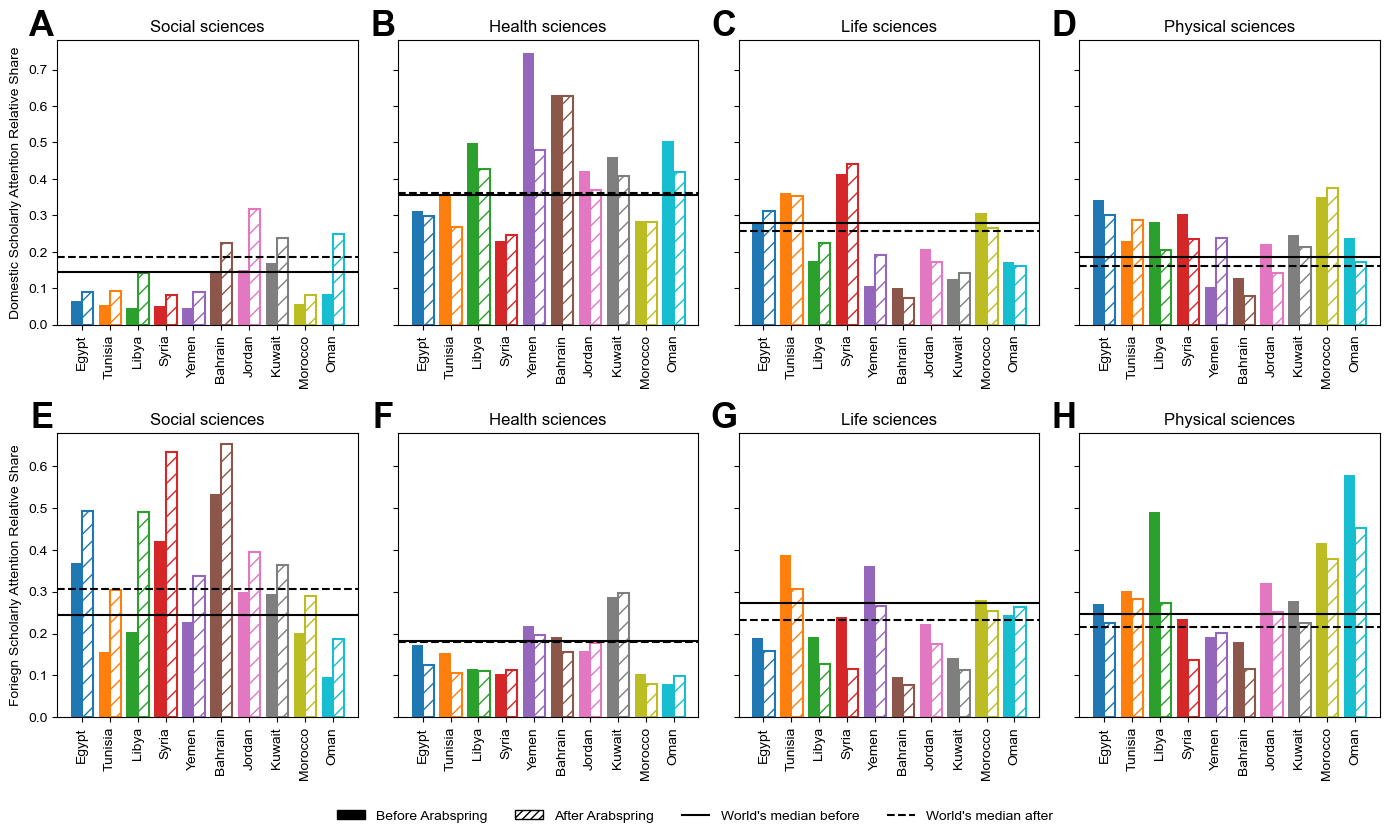

In [10]:
Country_list = {'Egypt':'EGY', 'Tunisia':'TUN', 'Libya':'LBY', 'Syria':'SYR', 'Yemen':'YEM',
                'Bahrain':'BHR', 'Jordan':'JOR', 'Kuwait':'KWT', 'Morocco':'MAR', 'Oman':'OMN'}
rev_Country_list = {Country_list[key].lower(): key for key in Country_list}
country_names = list(Country_list.keys())
custom_colors = [f'C{i}' for i in range(10)]
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 8))
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
k=0
for j, is_internal in enumerate([True, False]):
    for i, category in enumerate(['Social sciences', 'Health sciences', 'Life sciences', 'Physical sciences']):
        subset = result_df.query(f'cat == "{category}" and Mention_country in @abbr and is_internal_attention == {is_internal}')
        subset['Mention_country'] = subset['Mention_country'].map(rev_Country_list)
        subset['sorted_order'] = subset['Mention_country'].apply(lambda x: country_names.index(x))
        subset = subset.sort_values('sorted_order').drop(columns=['sorted_order'])

        # Reset the index if needed
        subset.reset_index(drop=True, inplace=True)
        x_labels = subset['Mention_country'].unique()
        x = np.arange(len(x_labels))  # X positions for the bars
        
        width = 0.4  # Width of each bar
        before_data = subset[subset['year_arabspring'] == 'before']['Share']
        after_data = subset[subset['year_arabspring'] == 'after']['Share']
        
        # Bars for 'before'
        ax[j][i].bar(
            x - width / 2, 
            before_data, 
            width=width, 
            color=custom_colors, 
            label='Before'
        )
        
        # Bars for 'after' with dashed patterns
        ax[j][i].bar(
            x + width / 2, 
            after_data, 
            width=width, 
            color='none', 
            edgecolor=custom_colors, 
            linewidth=1.5, 
            hatch='//', 
            label='After'
        )
        medians=result_df.query(f'cat == "{category}" and is_internal_attention=={is_internal}').groupby('year_arabspring')['Share'].median().to_dict()

        ax[j][i].axhline(medians['before'], color='k')
        ax[j][i].axhline(medians['after'], color='k', linestyle='--')
        
        # Set x-axis labels and title
        ax[j][i].set_xticks(x)
        ax[j][i].set_xticklabels(x_labels, rotation=90)
        ax[j][i].set_title(category)
        if j==0:
            ax[j][i].set_ylim(0, 0.78)
            ax[j][0].set_ylabel('Domestic Scholarly Attention Relative Share')


        else:
            ax[j][i].set_ylim(0, 0.68)
            ax[j][0].set_ylabel('Foriegn Scholarly Attention Relative Share')

        if i !=0:
            ax[j][i].set_yticklabels([])
            ax[j][i].text(-0.05, 1.05, subplot_labels[k], transform=ax[j][i].transAxes, fontsize=25, fontweight='bold', va='center', ha='center')
        else:
            ax[j][i].text(-0.05, 1.05, subplot_labels[k], transform=ax[j][i].transAxes, fontsize=25, fontweight='bold', va='center', ha='center')
        
        # Add subplot label (A, B, C, D) to the top-left corner
        
        
        k+=1
        # Create custom legend handles for the boxes
        solid_box = mpatches.Patch(facecolor='k', edgecolor='k', label='Before Arabspring')  # Solid box
        dashed_box = mpatches.Patch(facecolor='white', edgecolor='k', hatch='////', label='After Arabspring')  # Dashed pattern inside
            # Create custom legend handles with grey color
        before_handle = mlines.Line2D([], [], color='k', label='World\'s median before')
        after_handle = mlines.Line2D([], [], color='k', label='World\'s median after', linestyle='--')

        # Add the legend with custom handles
fig.legend(handles=[solid_box, dashed_box, before_handle,after_handle], loc='lower center', frameon=False, ncol=4,bbox_to_anchor=(0.5, -0.05))

plt.tight_layout()
plt.show()
